In [1]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 14s 1us/step


In [5]:
#Playing with shape
#x_temp=X_train
#x_temp.reshape(-1,60000).shape
x_temp = None

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

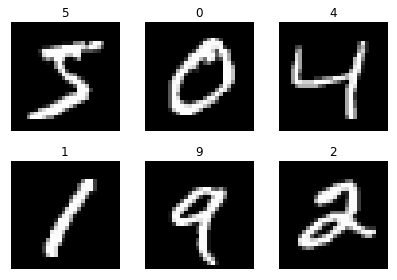

In [50]:
for i in range(0,6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_train[i],cmap="gray")
    plt.title(str(y_train[i]))
    plt.axis("off")
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()

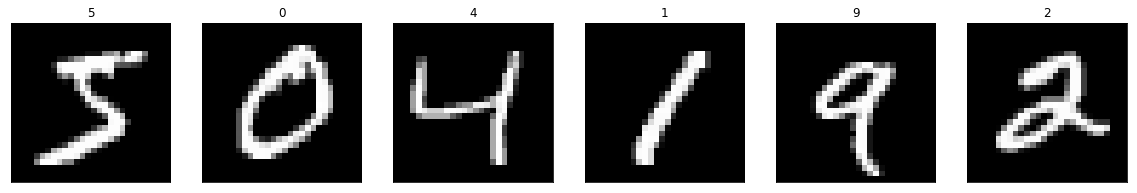

In [45]:
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
    ax.imshow(X_train[i],cmap="gray")
    ax.set_title(str(y_train[i]))

In [51]:
#rescale [0,255] -> [0,1]
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [63]:
#OnehotLabel
import pandas as pd
y_train=np.array(pd.get_dummies(y_train))

In [66]:
##Reshaping X_train
X_train_matrix = X_train.reshape(60000,-1)
X_train_matrix.shape

(60000, 784)

In [72]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation
model = Sequential()
model.add(Dense(32,input_dim=X_train_matrix.shape[1]))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(X_train_matrix,y_train,epochs=200,batch_size=124,verbose=0)
score = model.evaluate(X_train_matrix,y_train)

60000/60000 [==============================] - 2s 29us/step


In [78]:
X_test_flatten = X_test.reshape(X_test.shape[0],-1)
y_test_one_hot = np.array(pd.get_dummies(y_test))

In [79]:
score_test = model.evaluate(X_test_flatten,y_test_one_hot)
score_test[1]

10000/10000 [==============================] - 0s 31us/step


0.96430000000000005

In [ ]:
#Model in Lecture
from keras.layers import Dropout
model1 = Sequential()
model1.add(Dense(512,input_dim=X_train_matrix.shape[1]))
model1.add(Dropout(0.5))
model1.add(Dense(512))
model1.add(Dropout(0.7))
model1.add(Dense(10,activation="softmax"))
model1.summary()

In [100]:
model1.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])
score_1 = model1.evaluate(X_test_flatten,y_test_one_hot)
100*score_1[1]

10000/10000 [==============================] - 1s 139us/step


9.9199999999999999

In [101]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath="./best_weight_mnist.hdf5",verbose=1,
                              save_best_only=True)
hist = model1.fit(X_train_matrix,y_train,batch_size=128,epochs=6,validation_split=0.2,
                 callbacks=[checkpointer],verbose=1,shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
47872/48000 [============================>.] - ETA: 0s - loss: 0.6034 - acc: 0.8286
Epoch 00001: val_loss improved from inf to 0.31437, saving model to ./best_weight_mnist.hdf5
48000/48000 [==============================] - 10s 217us/step - loss: 0.6025 - acc: 0.8289 - val_loss: 0.3144 - val_acc: 0.9157
Epoch 2/6
47744/48000 [============================>.] - ETA: 0s - loss: 0.4850 - acc: 0.8694- ETA - ETA: 6s - - ETA: 4s - loss - ETA: 2s - l - ETA: 0s - loss: 0.4873 - acc: 
Epoch 00002: val_loss did not improve
48000/48000 [==============================] - 10s 209us/step - loss: 0.4851 - acc: 0.8693 - val_loss: 0.3626 - val_acc: 0.9019
Epoch 3/6
47744/48000 [============================>.] - ETA: 0s - loss: 0.4497 - acc: 0.8770- ETA: 3s - loss: 0.4563 - acc:  - ETA: 0s - loss: 0.4510 - acc:
Epoch 00003: val_loss did not improve
48000/48000 [==============================] - 9s 191us/step - loss: 0.4492 - acc: 0.8770 - val_lo

In [102]:
score_1 = model1.evaluate(X_test_flatten,y_test_one_hot)
100*score_1[1]

10000/10000 [==============================] - 1s 117us/step


91.459999999999994

# Convolution Neural Network

In [ ]:
##OK WITH Lossing DATA then PADDING = "VALID"
# IF NOT OK WITH LOSSING THE DATA THEN PADDING = "SAME"
#Depends on the stride of our filter



In [4]:
from keras.layers import Conv2D
Conv2D(filters,kernel_size,strides,padding,activation="relu",input_shape)
#filters - the number of filter
#Kernel_size - number specifying both height and width of (square)
#convolution window.
#activation-typically relu.if not specify anything then no activation function
#strongly encouraged to specify relu in activation 
#strides-the stride of convolution , if not specified then default is 1.
#padding - one of "valid" or "same" if nothing is not specified then by default is set to "valid"
#NOTE : it is possible to reperesent both kernel_size and strides as either a number or a tuple
#When using your convolution layer as the first layer (appearing after the input layer)in a model,we must provide a input shape
#And donot specify a input shape if its not the first layer.

# Example #1

In [5]:
#Say I'm constructing a CNN and my input layer accepts a grayscale images that are 
#200by200 pixels(corresponding to a 3D array with height 200, width 200 depth 1).Then
#say I'd like the next layer to be a convolution layer with 16 filters,each with width and 
#height of 3. When performing the convoultion, I'd like the filter to jump two pixels
#at a time. I also don't want the filter to extend outside of the image bondaries 
#in other words,I don't want to pad the images with zeros. Then, to construct this convolution 
#layer, I would use the following line of command



Conv2D(filters=16,kernel_size=2,strides=2,activation="relu",input_shape=(200,200,1))


# Example #2

In [6]:
# Say I'd like the next layer in my CNN to be a convolution layer that takes 
#the layer constructed in Example 1 as input. Say I'd like my new layer to have 32 
#filters,each with a height and width of 3.When performing convolution, I'd like the filter 
#to jump 1 pixels at a time. I want the convolution layer to see all regions of previous layer, and 
#so I don't mind if the filter hangs over the edge of previous layer when its performing
#the convolution. Then, to construct this convolution layer I would use following
#line of code
Conv2D(filters=32,kernel_size=3,padding="same",activation="relu")

# Example #3

In [7]:
#In this case, there are 64 filters and the size of filter is (2x2), and the 
#layer has a Relu activation function.The other arguments in the layer use the
#default values, so this convolution uses a stride of 1 and the padding is set to
#"valid"(so no padding)
Conv2D(64,(2,2),activation="relu")

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=2,strides=2,padding="valid",activation="relu",
                input_shape = (200,200,1)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 100, 100, 16)      80        
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [17]:
## Take note how the number of parameter in the convolution layer changes
## Params # 80 
## also notice the shape of the convolution layer changes . This corresponds
# to value under Output shape in the printed output.
# None corresponds to the batch size, and the convolution layer has. a height of 100,
# width of 100 and depth of 16


# Formula: Number of Parameter in a convolution Layer

Number of parameter in a covolution layer depends on the supplied values of **filters**, **kernel_size** and **input_shape**.
K - the number of filter in a convolution layer
F -  the height and width of convolution filters
D_in - the depth of previous layer
Notice that K = filters and F=kernel_size . likewise D_in the last value in the input_shape tuple.
Since there are (**F x F x D_in**) weights per filter, and the convolution layer is composed of K filters, the total number of weights in convolution layer is equal to **K x F x F x D_in** and there is a bias term per filter thus the number of parameters in convolution layer is give by **(K x F x F x D_in + K)**



In [19]:
2*2*16*1 + 16
## Above example number of parameters

80

# Formula: Shape of a Convolution Layer

The shape of a convoution layer depends on the supplied values of **kernel_size, input_shape, padding** and **stride**.
* K - the number of filter in the convolution layer 
* F - the height and width of convolution filters
* S - the stride of convolution filters
* H_in - the height of the previous layer
* W_in - the width of the previous layer
Notice that K = filters , F = kernel_size and S = stride and H_in and W_in is equal to first and second value of input_shape respectively.
* The depth of convolution layer will be always be equal to **K**(no of filter)
IF **padding = "same"**, then spatial dimension of the convolution layer are the following
* height = ceil(float(H_in)/float(S))
* width = ceil(float(W_in)/float(S))
If **padding = "valid"**, then spatial dimension of the convolution layer are the following:
* height = ceil(float(H_in - F +1)/float(S))
* width = ceil(float(W_in - F +1)/float(S))




# Quiz

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=3,strides=2,padding="same",
                activation = "relu",input_shape=(128,128,3)))
model.summary()
#Depth of convolution layer is equal to number of filter

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 64, 64, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


# Polling of layers!

# Max Pooling layer

In [36]:
# So if want to find a complex pattern in our data then we will have many filters 
#and dimentionalty we will increase thus it will overfit our training data
#THAT is the reason we introduce polling layer.
#first we will discuss about max polling layer 
#Max Pooling Layer
#Window Size: 2*2
#Strides 2
# So it reduces the dimension of convolution layer (Half of original size)



# Global average Pooling Layer!

In [37]:
# A global average pooling layer takes a 3D array and turns it into a vector.


## Max Pooling Layers in Keras

In [39]:
from keras.layers import MaxPooling2D
MaxPooling2D(pool_size=2,strides=2,padding="valid")

## Arguments
* pool_size - Number specifying the height and width of the pooling window
* strides - The vertical and horizontal stride. IF don't specify anything,strides will default to pool_size
* padding - One of the "valid" or "same". If don't specify anything padding is set to "valid"
Input could be number or tuple

## Example 
Say I'm constructing a CNN, and I'd like to reduce the dimentionality of a convolution layer by following it with a max pooling layer.Say the convolution layer has size **(100,100,15)** and I'd like the max pooling layer to have a size **(50,50,15)**. I can do this by using 2 x 2 window in my max pooling layer, with a stride of 2,which could be constructed in the following line of code.

In [41]:
MaxPooling2D(pool_size=2,strides=2)
# IF you'd like to use a stride of 1, but still keep the size of window at 
#2 x 2 then we could use
MaxPooling2D(pool_size=2,strides=1)

## Checking the Dimentionality of Max Pooling Layers


In [44]:
from keras.layers import MaxPooling2D
from keras.models import Sequential
model = Sequential()
model.add(MaxPooling2D(pool_size=2,strides=2,input_shape=(100,100,15)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 15)        0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [45]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",
                input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

## Things to Remember
* Always add a ReLU activation to Conv2D layer in your CNN. With the exception of the final layer in the network, Dense layers should also have a ReLU activation function
* When constructing a network for classification, the final layer in the network should be a dense layer with a Softmax activation function. The number of nodes in the final layer should be equal the total number of classes in the dataset.


# CIFAR-10 --CNNs

In [46]:
import keras 
from keras.datasets import cifar10

# LOAD THE PRE -SHUFFLED TRAIN AND TEST DATA
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

 89333760/170498071 [==============>...............] - ETA: 8:23

KeyboardInterrupt: 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i])) 